# Bike Sharing Demand

Bisiklet paylaşım sistemleri, üyelik, kiralama ve bisiklet iadesi alma sürecinin bir şehrin dört bir yanındaki kiosk lokasyonlarından oluşan bir ağ üzerinden otomatikleştirildiği bir bisiklet kiralama yöntemidir. Bu sistemleri kullanarak, insanlar bir lokasyondan bisiklet kiralayabilir ve ihtiyaç duyduklarında farklı bir lokasyona iade edebilirler. Şu anda dünya çapında 500'den fazla bisiklet paylaşım programı bulunmaktadır.

Bu projemizde bikletlerin kiralanma sayılarını tahmin eden bir model geliştireceğiz

<img src="https://storage.googleapis.com/kaggle-media/competitions/kaggle/3948/media/bikes.png" width=1200>

<a href="https://www.kaggle.com/competitions/bike-sharing-demand/data">Dataya Buradan Erişebilirsiniz</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
#df['date'] = pd.to_datetime(df['datetime']).dt.date

In [9]:
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['time'] = pd.to_datetime(df['datetime']).dt.time

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
df['time'] = le.fit_transform(df['time'])

In [13]:
#df['date'] = le.fit_transform(df['date'])

In [14]:
df.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,time
9581,2012-10-03 14:00:00,4,0,1,2,29.52,34.090,70,11.0014,56,195,251,2012,10,14
1724,2011-04-17 18:00:00,2,0,0,1,22.96,26.515,30,26.0027,102,175,277,2011,4,18
9543,2012-10-02 00:00:00,4,0,1,2,22.96,26.515,73,0.0000,1,30,31,2012,10,0


<Axes: xlabel='holiday', ylabel='count'>

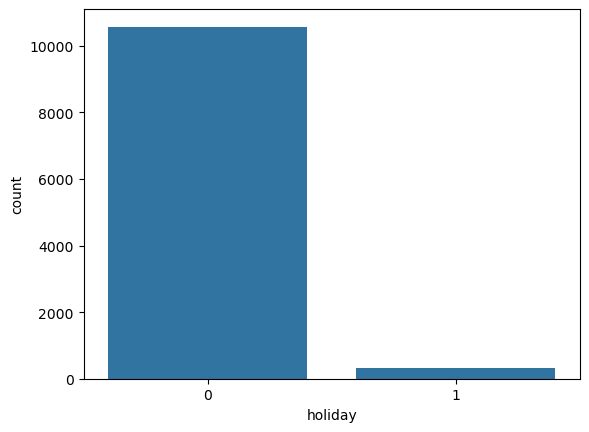

In [15]:
sns.countplot(x=df["holiday"])

<Axes: xlabel='time', ylabel='count'>

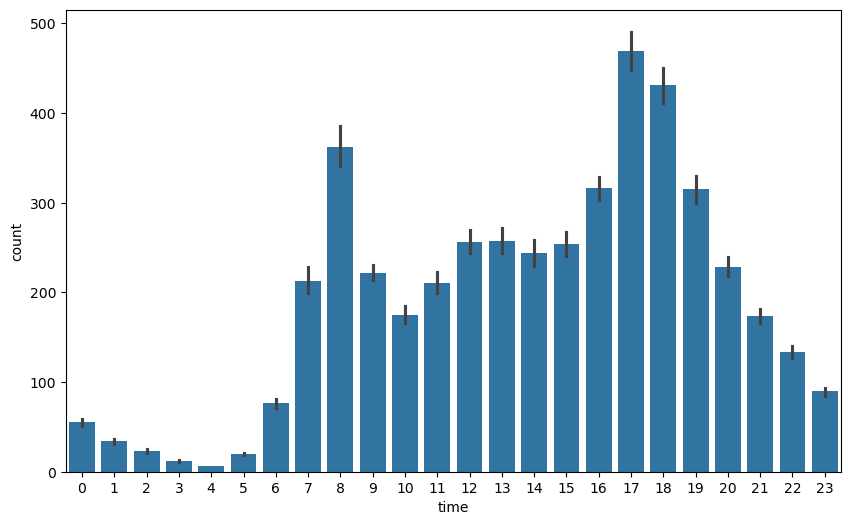

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='time', y='count', data=df)

<Axes: xlabel='year', ylabel='count'>

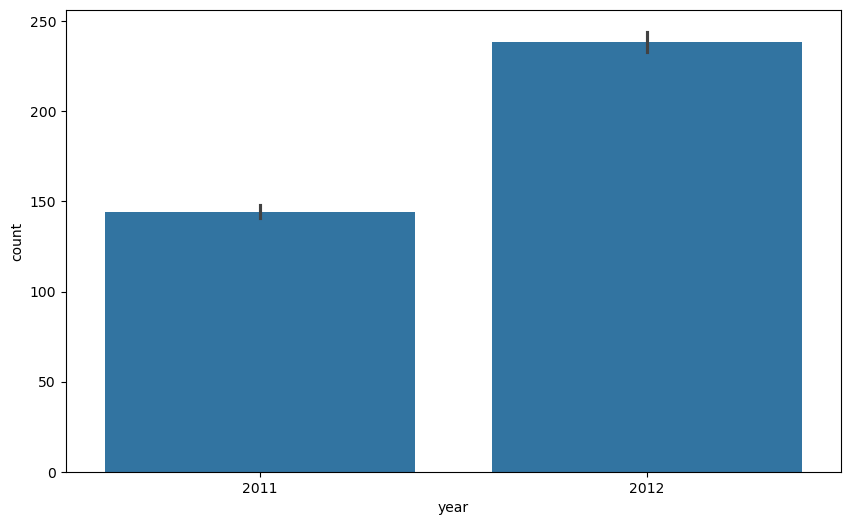

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='count', data=df)

In [18]:
df=df.drop(["datetime","casual","registered"],axis=1)

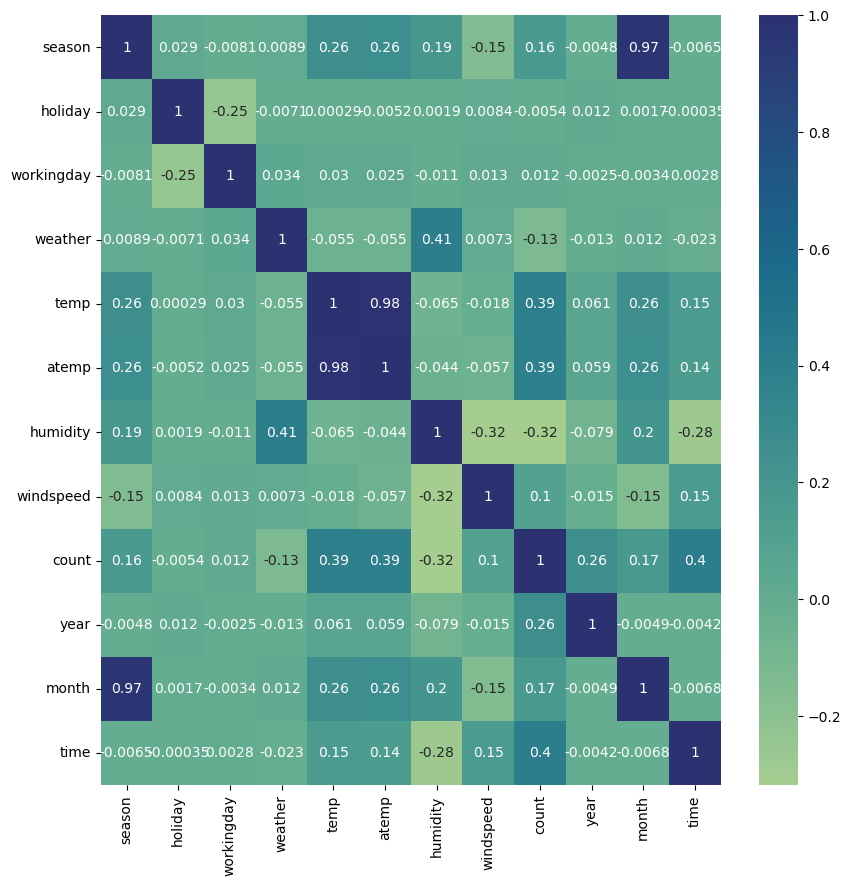

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="crest");

### Modelling

In [20]:
x=df.drop(["count"],axis=1)
y=df["count"]

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [22]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,9.469045e-01,4.186311e+01,2.804923e+01
Decision Tree,8.803973e-01,6.283088e+01,3.795202e+01
Extra Tree,8.684640e-01,6.589081e+01,3.908425e+01
Gradient Boosting,8.598199e-01,6.802143e+01,4.613197e+01
KNeighborsRegressor,6.872176e-01,1.016070e+02,8.291108e+01
AdaBoost,5.415439e-01,1.230131e+02,8.472645e+01
mlp_regressor,4.785654e-01,1.311905e+02,9.731223e+01
Lasso,3.953619e-01,1.412701e+02,1.050350e+02
Ridge,3.953613e-01,1.412702e+02,1.053506e+02
Linear,3.953606e-01,1.412703e+02,1.053525e+02


In [23]:
xgb=XGBRegressor()

In [24]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [25]:
mod=xgb.fit(x_train,y_train)

In [26]:
thmn=xgb.predict(x_test)

In [27]:
r2_score(y_test,thmn)

0.9469045001066291

In [29]:
import pickle
pickle.dump(mod,open("bike.pkl","wb")) # Eğittiğimiz modeli kaydediyoruz

In [30]:
test=pd.read_csv("test.csv")

In [31]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [32]:
dosya=pd.DataFrame()

In [33]:
test["datetime"]=pd.to_datetime(test["datetime"])

In [34]:
dosya["datetime"]=test["datetime"]

In [35]:
test['year'] = pd.to_datetime(test['datetime']).dt.year
test['month'] = pd.to_datetime(test['datetime']).dt.month
test['time'] = pd.to_datetime(test['datetime']).dt.time

In [36]:
test['time'] = le.fit_transform(test['time'])

In [37]:
test=test.drop("datetime",axis=1)

In [38]:
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,time
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,12,19
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,12,20
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,12,21
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,12,22


In [39]:
dosya["count"]=mod.predict(test)

In [40]:
dosya["count"]=dosya["count"].astype(int)

In [41]:
dosya["count"] = np.clip(dosya["count"], a_min=0, a_max=None)

In [42]:
dosya.head()

,datetime,count
0,2011-01-20 00:00:00,17
1,2011-01-20 01:00:00,6
2,2011-01-20 02:00:00,3
3,2011-01-20 03:00:00,8
4,2011-01-20 04:00:00,7


In [43]:
dosya.to_csv("tahmin1.csv",index=False)

In [44]:
dosya["count"].unique()

array([ 17,   6,   3,   8,   7,  12,  37, 123, 247, 135,  60,  53,  99,
        65,  63,  66,  79, 191, 176,  67,  46,  28,   5,   9,   0,  27,
        41, 104, 205, 117,  40,  32,  45,  52,  15,  55, 145, 130,  70,
        23,  13,  22,  18,  10,  50, 105, 106,  93, 100,  61,  38,  35,
         4,  75,  90,  84,  87,  56,  47,  20,  34,  30,  71, 189,  51,
       156, 147,  64,  43,   1,  31,  80, 210, 127,  36,  83, 107, 211,
       169, 115,   2,  44,  77, 175, 146,  89,  72,  48,  25, 213,  21,
        59, 177, 174, 110,  39,  24,  92, 111, 101,  85,  29,  33,  88,
       121, 119, 137, 114,  19,  26, 199, 113, 160, 158,  14,  16,  97,
       129, 185, 182, 183, 165, 128, 109,  98, 139, 136, 112,  94,  42,
        49, 192, 215,  57,  82, 120, 232, 153,  81,  11, 241, 126,  73,
       155,  86, 187,  95, 162, 173, 172, 142, 132,  62, 103, 149, 207,
       204, 244,  76,  54,  96, 143, 171, 194,  68, 265, 154, 394, 383,
       306, 214, 300, 116, 167, 180, 432, 338, 200, 131, 317,  5

### Deep Learning

In [45]:
from sklearn.preprocessing import normalize, scale
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [46]:
x=df.drop(["count"],axis=1)
y=df["count"]

In [47]:
x=scale(x)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20 ,random_state=42)

In [49]:
model=Sequential()
model.add(Dense(120,activation="relu")) 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1)) 
model.compile(loss="mse", optimizer="adam")                                     

In [50]:
history=model.fit(x_train,y_train ,validation_data=(x_test,y_test), batch_size=128, epochs=300)

Epoch 1/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 66895.9453 - val_loss: 24998.7422
Epoch 2/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22136.7695 - val_loss: 19892.6855
Epoch 3/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19655.1895 - val_loss: 19555.9238
Epoch 4/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19731.5273 - val_loss: 19417.8887
Epoch 5/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19811.0566 - val_loss: 18714.0020
Epoch 6/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19441.2617 - val_loss: 18014.1738
Epoch 7/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17427.2637 - val_loss: 16825.7500
Epoch 8/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17324.8184 - val_loss: 15439.2852
Epoch 9/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14003.7549 - val_loss: 14049.7354
Epoch 10/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13818.4072 - val_loss: 12165.9717
Epoch 11/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11655.362

In [51]:
tahmin=model.predict(x_test)

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [52]:
from sklearn.metrics import r2_score, mean_squared_error

In [53]:
r2_score(tahmin,y_test)

0.9412455573862942

In [54]:
mean_squared_error(tahmin,y_test)**.5

42.70683893617057

In [55]:
loss_f=pd.DataFrame(history.history)

<Axes: >

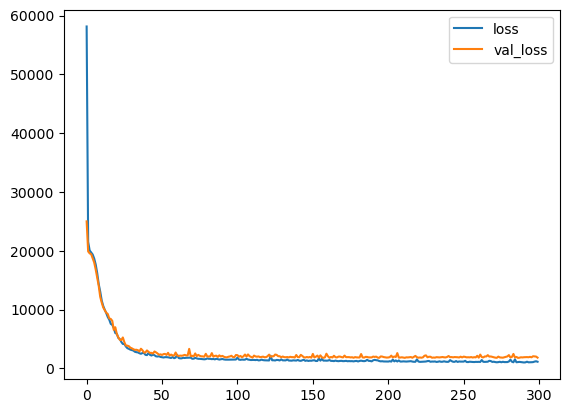

In [56]:
loss_f.plot()

Sonuc olarak verimiz isleyip önce ML sonra da DL kullanarak modelimizi egittik.